In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import cv2 
from matplotlib import pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import neighbors, datasets

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_Qantas_Airways_Boeing_717-200-125_new_plane718.svg.pngprocesses(process_array)


SyntaxError: invalid token (<ipython-input-3-851d512a21e1>, line 6)

In [4]:
liste1 = os.listdir('/home/hassan/ProjetInterpromo2020g8/images')
listmp = []
for fichier in liste1:
    if 'Seat'in fichier:
        listmp.append(fichier)
print(listmp)
# Image
img_rgb = cv2.imread('../LAYOUT SEATGURU/China_Southern_Boeing_737-800A_plane294.jpg',1) 
img_gray = cv2.imread('../LAYOUT SEATGURU/China_Southern_Boeing_737-800A_plane294.jpg',0) 
# Tamplates
for tmp in listmp:
    w, h = cv2.imread('images\\'+tmp,0 ).shape[::-1]
    # Found the tampales using methode TM_CCOEFF_NORMED
    res = cv2.matchTemplate(img_gray,cv2.imread('images\\'+tmp,0 ),cv2.TM_CCOEFF_NORMED) 
    THRESHOLD : float = 0.8
    # Detected the tamplate
    position = np.where( res >= THRESHOLD) 
    #faoire des rectangle sur les tamplate sur l'image 
    for pt in zip(*position[::]): 
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) 
    #montrer l'image avec detection de tamplate 
cv2.imshow('seats detected', img_rgb) 
cv2.waitKey()

FileNotFoundError: [Errno 2] No such file or directory: '/home/hassan/ProjetInterpromo2020g8/images'

[133, 134, 176, 202, 203, 261, 262, 202, 253, 254, 202, 253, 254, 176, 203, 176, 202, 203, 262, 133, 134, 176, 261, 262, 202, 202, 253, 254, 253, 254, 176, 203, 176, 203, 133, 134, 261, 262, 185, 244, 134, 135, 184, 211, 262, 263, 134, 135, 184, 211, 262, 263, 185, 185, 244, 185, 244, 184, 211, 184, 185, 211, 134, 135, 262, 263, 134, 135, 262, 263, 185, 185, 244]
73
[286, 286, 286, 286, 286, 286, 286, 319, 319, 319, 320, 320, 320, 351, 351, 352, 352, 352, 352, 353, 353, 353, 353, 353, 384, 385, 386, 386, 387, 387, 416, 416, 417, 417, 420, 420, 420, 420, 286, 286, 319, 319, 319, 319, 319, 319, 320, 320, 320, 320, 320, 320, 351, 352, 352, 353, 353, 384, 384, 385, 385, 385, 386, 386, 386, 386, 387, 387, 387, 387, 416, 417, 420]
73


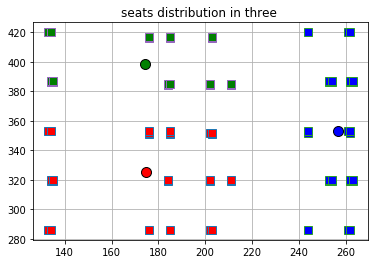

In [5]:
f = open('/home/hassan/Téléchargements/coord-Aer_Lingus_Airbus_A330-200_plane4-BusinessSeats.txt')
df = pd.DataFrame([line.replace('\n','').split(',') for line in f.readlines()])
df
c1=[]
c2=[]
for el in df[0].tolist():
    c1.append(int(el)) 
for el in df[1].tolist():
    c2.append(int(el)) 
print(c1)
print(len(c1))
print(c2)
print(len(c2))
n_clusters = 3
X = np.array(list(zip(c1, c2)))
kmeans = KMeans(n_clusters, random_state = 0).fit(X)
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

# Plot resultat
colors = ['red', 'blue','green','yellow','cyan','grey']
plt.figure()
for k, col in zip(range(n_clusters), colors):
    mon_element = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[mon_element, 0], X[mon_element, 1], 's',
            markerfacecolor=col, markersize=8)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=10)
plt.title('seats distribution in three ')    
plt.grid(True)
plt.show()

# using argpartition

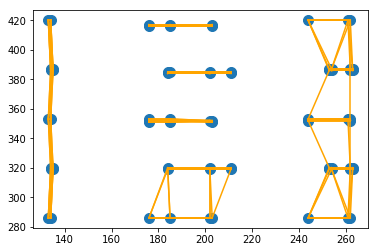

In [6]:
plt.scatter(c1,c2,s=100)
X = np.array(list(zip(c1, c2)))
a = X[:,np.newaxis,:]
b = X[np.newaxis,:,:]
#print(a)
#print(b)
dif = abs(a-b)
#print(dif)
dif.shape
sq_dif = dif**2
sq_dif.shape
dis=sq_dif.sum(-1)
dis.shape
#print(dis)
k=5
nearest_seat=np.argpartition(dis,k,axis=1)
nearest_seat
for i in range(X.shape[0]):
    for j in nearest_seat[i,:k+1]:
        plt.plot(*zip(X[j],X[i]), color='orange')


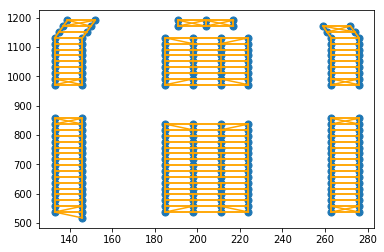

In [7]:
g = open('/home/hassan/Téléchargements/coord-Aer_Lingus_Airbus_A330-200_plane4-NormalSeats.txt')
dg = pd.DataFrame([line.replace('\n','').split(',') for line in g.readlines()])
dg
## coordinates of  economicclass seat
g1=[]
g2=[]
for el in dg[0].tolist():
    g1.append(int(el)) 
for el in dg[1].tolist():
    g2.append(int(el)) 
Y = np.array(list(zip(g1, g2)))
plt.scatter(g1,g2,s=50)
##found the nearest neibors of each seat
ga = Y[:,np.newaxis,:]
gb = Y[np.newaxis,:,:]
#distance ga -- gb
difg = abs(ga-gb)
#print(dif)
difg.shape
sq_difg = difg**2
sq_difg.shape
disg=sq_difg.sum(-1)
disg.shape
#print(dis)
k=3###  choise the distance of " neibors for each seat
nearest_seatg=np.argpartition(disg,k,axis=1)
for i in range(Y.shape[0]):
    for j in nearest_seatg[i,:k+1]:
        # plotting lines between neibors
        plt.plot(*zip(Y[j],Y[i]), color='orange')


coordinates of the tamplate seat (16, 14)
12
[[(133, 286), (133, 286), (176, 286), (203, 286), (262, 286), (133, 353), (133, 420), (185, 286), (134, 319), (134, 320), (134, 386), (134, 387)], [(202, 286), (134, 286), (261, 286), (202, 320), (203, 351), (202, 352), (202, 384), (203, 416), (203, 417), (244, 286), (211, 319), (211, 320), (211, 384), (211, 385)], [(253, 319), (202, 319), (254, 319), (254, 320), (262, 352), (261, 353), (253, 386), (253, 387), (261, 420), (135, 319), (262, 319), (135, 320), (262, 320), (244, 352), (244, 353), (262, 386), (262, 387), (244, 420)], [(176, 351), (176, 351), (203, 352), (176, 353), (176, 416), (184, 319), (184, 320), (185, 351), (185, 353), (184, 385), (185, 416)], [(134, 353), (176, 352), (262, 353), (134, 420), (185, 352), (135, 386), (135, 387)], [(254, 386), (253, 319), (202, 385), (254, 387), (262, 420), (263, 320), (185, 385), (263, 387)], [(184, 384), (254, 386), (184, 384), (185, 417)]]
14
[[(133, 286), (133, 286), (176, 286), (203, 286),

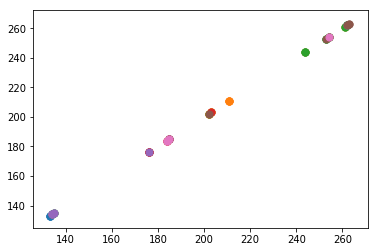

In [8]:
####### working on business class
X = np.array(list(zip(c1, c2)))
## coordinates of seats
Z=list(zip(c1, c2))
grp = [] # to save the different groupe of seats

## coordinates tamplate whiteseat
template = cv2.imread('./images/templateTest-sansBlanc.png', 0)
h, w = template.shape
print('coordinates of the tamplate seat',template.shape)
t1 = template.shape[1]
t0 = template.shape[0]
#### compared distance between seat y and other seats  in matrix Y with the dimension tamplate
for y in Z:
    grp.append([])
    grp[-1].append(y)
    for z in Z:
        if abs(y[0]-z[0])<t0 or abs(y[0]-z[0])<t1 or abs(y[1]-z[1])<t1 or abs(y[1]-z[1])<t0:
            grp[-1].append(z)
            Z.pop(Z.index(z))
# get diff groupes of seats
for t in range(len(grp)):
    print(len(grp[t]))
    print(grp)
# plotting each point groupe seats
listplotx=[]
listploty=[]
for j in range(len(grp)):
    listplotx.append([])
    listploty.append([])
    for k in range(len(grp[j])):
        listplotx[j].append(grp[j][k][0])
        listploty[j].append(grp[j][k][0])
    plt.scatter(listplotx[j],listploty[j],s=50)


12
14
18
11
7
8
4
31
31
30
52
28
28
15
7


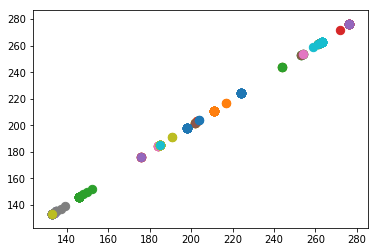

In [9]:
#### working on economiclass seats  
Z=list(zip(g1, g2))
#### compared distance between seat y and other seats  in matrix Y with the dimension tamplate
for y in Z:
    grp.append([])
    grp[-1].append(y)
    for z in Z:
        if abs(y[0]-z[0])<t0 or abs(y[0]-z[0])<t1 or abs(y[1]-z[1])<t1 or abs(y[1]-z[1])<t0:
            grp[-1].append(z)
            Z.pop(Z.index(z))

# get diff groupes of seats
for t in range(len(grp)):
    print(len(grp[t]))
# plotting each point groupe seats
listplotx=[]
listploty=[]
for j in range(len(grp)):
    listplotx.append([])
    listploty.append([])
    for k in range(len(grp[j])):
        listplotx[j].append(grp[j][k][0])
        listploty[j].append(grp[j][k][0])
    plt.scatter(listplotx[j],listploty[j],s=70)
    #plt.scatter(listplotx[j], listploty[j], c=labels, s=70, alpha=0.5)